In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import category_encoders as ce
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('car_evaluation.csv')

In [5]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
x=data.drop(['class'],axis=1)
y=data['class']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
x_train.shape,x_test.shape

((1208, 6), (519, 6))

In [12]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [30]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 3.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.634\nsamples = 406\nvalue = [216.0, 52.0, 96.0, 42.0]'),
 Text(0.5, 0.125, 'gini = 0.458\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

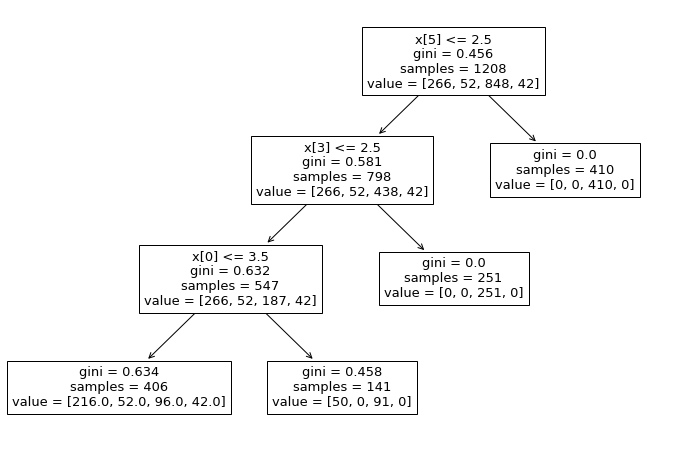

In [31]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(x_train, y_train))

In [32]:
y_pred = clf.predict(x_test)


In [33]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.8150
